# Principal component analysis with sklearn

In [ ]:
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [3]:
iris = datasets.load_iris()

In [4]:
target_names = iris.target_names

In [5]:
X = pd.DataFrame(iris.data)

In [6]:
X.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [7]:
for name in X.columns: 
    X[name] = (X[name]-X[name].mean())/X[name].std()

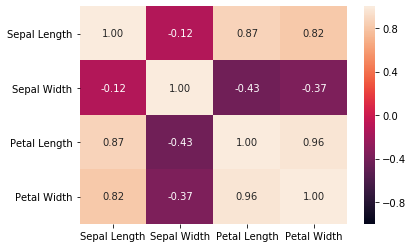

In [8]:
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='2.2f')

In [9]:
import numpy as np

In [10]:
# calculate the Covariance matrix
Q = X.cov().to_numpy()# find the eigenvalue and eigenvector of the Covariance matrix
D, V = np.linalg.eigh(Q) # print the results
np.set_printoptions(precision=2)
print('principal components:')

principal components:


In [11]:
for i in range(1, len(D)):
    print('Feature %d : %2.3f'%(i, D[i]))

Feature 1 : 0.147
Feature 2 : 0.914
Feature 3 : 2.918


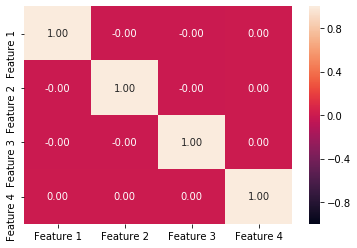

In [12]:
# perform the linear transformation
X_new = X.dot(V)# define the columns names to the X_new
X_new.columns = ["Feature %d"%i for i in range(1,5)]# The correlation between different features disappear!
sns.heatmap(X_new.corr(), vmin=-1, vmax=1, annot=True, fmt='2.2f')

In [13]:
# truncation: dimensional reduction
X_reduced = X.copy()

In [14]:
V_trun = V[:,2:4]

In [15]:
X_reduced = X_reduced.dot(V_trun)

In [16]:
X_reduced['Species'] = iris.target

In [17]:
X_reduced.columns = ['Feature 3', 'Feature 4', 'Species']

In [18]:
for i, t in enumerate(target_names):
    X_reduced['Species'].replace(i, t, inplace=True)

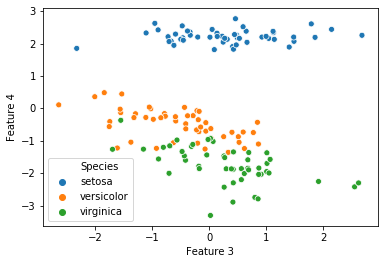

In [19]:
sns.scatterplot(data=X_reduced, x='Feature 3', y='Feature 4', hue='Species')

In [20]:
from sklearn.decomposition import PCA

In [21]:
X3 = X.to_numpy()
pca = PCA(n_components=3, random_state=0)
X3_reduced = pca.fit(X3).transform(X3)
X3_reduced = pd.DataFrame(X3_reduced)
X3_reduced['species'] = iris.target# plot the results in 3D scatter plot

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Text(0.5, 0, 'Feature 4')

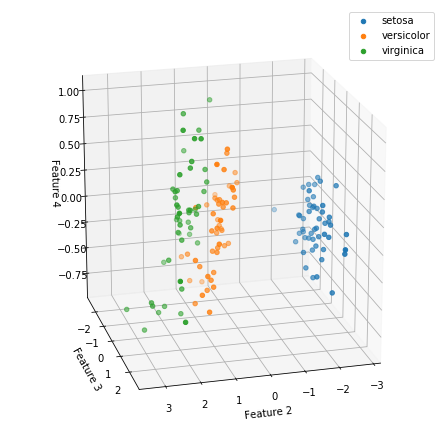

In [23]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

for i in range(3):
    idx = X3_reduced['species']==i
    ax.scatter(X3_reduced[0][idx], X3_reduced[1][idx], X3_reduced[2][idx], label=target_names[i])
plt.legend()
ax.view_init(20,75)
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
ax.set_zlabel('Feature 4')